# Email Spam
Wat zit in dit notebook:
1. Feedforward - L2 regularisatie
2. NN scratch
3. Taalmodel - DistilBERT


# Neural Network

#### Feedforward neural network model

Een feedforward neural network model met meerdere dense layers is een type kunstmatig neuraal netwerk waarin informatie slechts in één richting stroomt, namelijk van de inputlaag naar de outputlaag. Dit type netwerk staat ook bekend als een multilayer perceptron (MLP). De dense layers in deze modellen worden ook wel fully connected layers genoemd, omdat elke neuron in een laag verbonden is met elke neuron in de voorgaande laag.

In [6]:
import pandas as pd
csv_file = pd.read_csv('../datasets/emails.csv')
csv_file

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              9003000   
                                                                 
 dropout (Dropout)           (None, 3000)              0         
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dropout_1 (Dropout)         (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 12,006,002
Trainable params: 12,006,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


2023-06-12 23:53:10.424801: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


40/40 [==============================] - 3s 57ms/step - loss: 2.4880 - accuracy: 0.7735 - val_loss: 0.2140 - val_accuracy: 0.9227
Epoch 2/10
40/40 [==============================] - 2s 59ms/step - loss: 0.1617 - accuracy: 0.9491 - val_loss: 0.1516 - val_accuracy: 0.9710
Epoch 3/10
40/40 [==============================] - 2s 54ms/step - loss: 0.0826 - accuracy: 0.9799 - val_loss: 0.1115 - val_accuracy: 0.9662
Epoch 4/10
40/40 [==============================] - 2s 54ms/step - loss: 0.0661 - accuracy: 0.9817 - val_loss: 0.7598 - val_accuracy: 0.9227
Epoch 5/10
40/40 [==============================] - 2s 55ms/step - loss: 0.0730 - accuracy: 0.9860 - val_loss: 0.0582 - val_accuracy: 0.9710
Epoch 6/10
40/40 [==============================] - 2s 58ms/step - loss: 0.0285 - accuracy: 0.9924 - val_loss: 0.0508 - val_accuracy: 0.9807
Epoch 7/10
40/40 [==============================] - 2s 58ms/step - loss: 0.0404 - accuracy: 0.9913 - val_loss: 0.1458 - val_accuracy: 0.9324
Epoch 8/10
40/40 [======

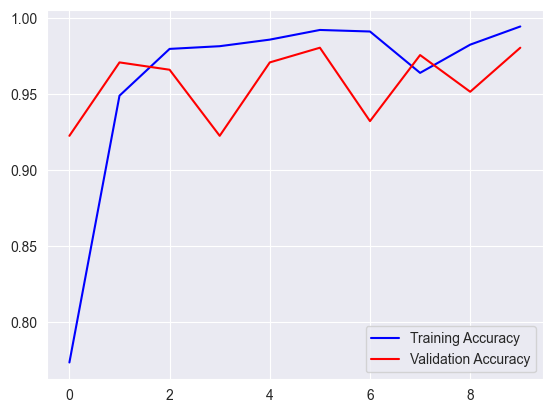

In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# prepare data
layers = tf.keras.layers
csv_file = pd.read_csv('../datasets/emails.csv')

x_train = csv_file.iloc[:, 1:3001]

y_train = pd.get_dummies(csv_file['Prediction'])
del csv_file['Prediction']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)  # split train and test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05)  # split train adn validation

# building the model
model = tf.keras.models.Sequential()
model.add(layers.Dense(3000, input_dim=3000, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1000, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_val, y_val))
evaluation = model.evaluate(x_test, y_test)

# plot the training history
plt.plot(range(10), history.history.get('accuracy'), label='Training Accuracy', color='blue')
plt.plot(range(10), history.history.get('val_accuracy'), label='Validation Accuracy', color='red')
plt.legend()
plt.show()

De training accuracy heeft bijna een score van 1. Dit vind ik te hoog en ik ben bang dat het model moeite zal hebben met nieuwe data te herkennen en juist te classificeren.

# L2-regularisatie
Om regularisatie toe te passen en overfitting te voorkomen, kunnen verschillende technieken worden gebruikt. Een veelgebruikte techniek is L2-regularisatie, ook bekend als gewichtsafbraak (weight decay). Hier is een aangepaste versie van de code van hierboven, waarin L2-regularisatie wordt toegepast:

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 3000)              9003000   
                                                                 
 dropout_2 (Dropout)         (None, 3000)              0         
                                                                 
 dense_4 (Dense)             (None, 1000)              3001000   
                                                                 
 dropout_3 (Dropout)         (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 2)                 2002      
                                                                 
Total params: 12,006,002
Trainable params: 12,006,002
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
40/40 [========================

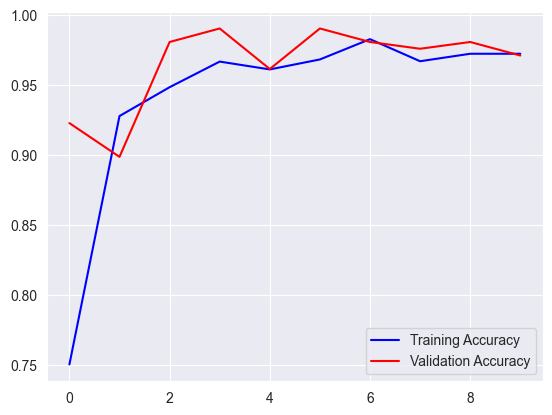

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# prepare data
layers = tf.keras.layers
csv_file = pd.read_csv('../datasets/emails.csv')

x_train = csv_file.iloc[:, 1:3001]

y_train = pd.get_dummies(csv_file['Prediction'])
del csv_file['Prediction']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)  # split train and test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05)  # split train and validation

# building the model
model = tf.keras.models.Sequential()
model.add(layers.Dense(3000, input_dim=3000, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1000, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(2, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_val, y_val))
evaluation = model.evaluate(x_test, y_test)

# plot the training history
plt.plot(range(10), history.history.get('accuracy'), label='Training Accuracy', color='blue')
plt.plot(range(10), history.history.get('val_accuracy'), label='Validation Accuracy', color='red')
plt.legend()
plt.show()


De accuracy is wel omlaag gegaan maar het verschil tussen training en val score is vergroot. Training zit boven val dus dit laat zien dat er nog steeds overfitting is. L2 regularisatie heeft niet geholpen.

# NeuralNetwork From Scratch

Deze code implementeert een eenvoudig neuraal netwerk met één verborgen laag om te worden gebruikt voor classificatie van e-mails.

# De code in stappen

#### 1. Voorbereiden
1. De benodigde bibliotheken, zoals NumPy en pandas, worden geïmporteerd.

2. De e-maildataset wordt gelezen vanuit een CSV-bestand en opgeslagen in het `csv_file`-object.

3. De dataset wordt gesplitst in features (x) en labels (y). De features bevatten de kolommen van 1 tot 3000 van het CSV-bestand, terwijl de labels worden verkregen door de 'Prediction'-kolom te encoderen met behulp van one-hot encoding met behulp van `pd.get_dummies()`. De 'Prediction'-kolom wordt vervolgens uit de dataset verwijderd.

4. De features en labels worden omgezet naar NumPy-arrays met behulp van `np.asarray()`.

5. De dataset wordt verdeeld in trainings-, validatie- en testdatasets met behulp van de `train_test_split`-functie van scikit-learn. Hier wordt 80% van de gegevens gebruikt voor training, 5% voor validatie en 15% voor testen.

#### 2. Architectuur
#### activatiefuncties
6. Er worden twee activatiefuncties gedefinieerd: sigmoid en ReLU. Deze worden later gebruikt in de voorwaartse propagatie van het neurale netwerk.
- Om niet-lineariteit te introduceren en de activatie van neuronen te bepalen.

    1. Sigmoid-functie:
       De sigmoid-functie wordt gedefinieerd als: sigmoid(x) = 1 / (1 + exp(-x)). Deze functie neemt een reëel getal als input en drukt het uit in het bereik tussen 0 en 1. Het wordt vaak gebruikt in de outputlaag van een binair classificatiemodel om de kans te berekenen dat een voorbeeld tot een bepaalde klasse behoort. Het geeft een continue, aflopende S-vormige curve weer.

    2. ReLU-functie (Rectified Linear Unit):
       De ReLU-functie wordt gedefinieerd als: relu(x) = max(0, x). Deze functie neemt een reëel getal als input en geeft hetzelfde getal terug als het positief is, anders geeft het 0 terug. Het wordt vaak gebruikt als activatiefunctie in de verborgen lagen van een neuraal netwerk vanwege de eenvoudige berekening en het vermogen om efficiënt gradienten door te geven tijdens achterwaartse propagatie. Het helpt ook bij het oplossen van het probleem van de verdwijnende gradiënt.

    In de code worden deze activatiefuncties gebruikt in de `forward`-methode van de `NeuralNetwork`-klasse. De `relu`-functie wordt toegepast op de output van de eerste lineaire transformatie (`self.z1`) om de activaties van de verborgen laag (`self.a1`) te berekenen. De `sigmoid`-functie wordt vervolgens toegepast op de output van de tweede lineaire transformatie (`self.z2`) om de activaties van de outputlaag (`self.a2`) te berekenen.
#### klasse NeuralNetwork
7. De klasse `NeuralNetwork` wordt gedefinieerd. Het heeft drie attributen: `input_size`, `hidden_size` en `output_size`, die respectievelijk de grootte van de inputlaag, verborgen laag en outputlaag aangeven.
    1. Input_size:
       De input_size is de dimensie van de invoerfeature-vector. In dit geval is de input_size ingesteld op 3000. Het is belangrijk dat de input_size overeenkomt met het aantal features in de dataset. Als de dataset 3000 features heeft, is het logisch om de input_size op 3000 te zetten, zodat het netwerk de juiste dimensie heeft om de gegevens te verwerken.

    2. Hidden_size:
       Hidden_size verwijst naar het aantal neuronen in de verborgen laag van het netwerk. In dit geval is hidden_size ingesteld op 1000. De keuze voor de grootte van de verborgen laag kan afhangen van verschillende factoren, zoals de complexiteit van het probleem, de beschikbare gegevens en rekenbronnen. Een te kleine hidden_size kan ertoe leiden dat het netwerk niet genoeg representatieve capaciteit heeft om complexe patronen in de gegevens te leren. Een te grote hidden_size kan echter leiden tot overfitting en een langere trainingstijd. Het is vaak nuttig om te experimenteren met verschillende hidden_sizes om de beste prestaties te vinden.

   3. Output_size:
       Output_size is de dimensie van de uitvoer. In dit geval is output_size ingesteld op 2, wat suggereert dat het netwerk wordt gebruikt voor een binair classificatieprobleem. Het aantal klassen in uw probleem bepaalt de output_size. Voor een meerklasse-classificatieprobleem zou output_size gelijk zijn aan het aantal klassen in de dataset.
    [Bron: Input,Output,Hidden]( https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw#:~:text=The%20number%20of%20hidden%20neurons,size%20of%20the%20input%20layer)
#### initialisatiemethode
8. De initialisatiemethode van de `NeuralNetwork`-klasse initialiseert de gewichten en biases van de netwerkparameters (`self.W1`, `self.b1`, `self.W2`, `self.b2`) met behulp van willekeurige waarden.
    - De willekeurige waarden: Dit wordt vaak gedaan om te voorkomen dat alle neuronen in het netwerk dezelfde updates krijgen tijdens het trainingsproces.

    Het gebruik van willekeurige initialisatie zorgt ervoor dat elk neuron in het netwerk een verschillende startpositie heeft en dat ze individueel kunnen leren verschillende functies van de invoergegevens te modelleren. Dit kan de convergentie van het netwerk verbeteren en voorkomt dat alle neuronen dezelfde kenmerken van de gegevens proberen te leren.
#### binary_crossentropy
9. `binary_crossentropy`-methode
    - Deze methode berekent de binaire cross-entropie tussen de werkelijke labels (y_true) en de voorspelde waarden (y_pred)
    - Hierbij is y_true het werkelijke klasse-etiket (0 of 1) en y_pred de voorspelde waarde door het neurale netwerk (een waarde tussen 0 en 1). De binary cross entropy-functie berekent voor elk voorbeeld de logaritmische verlieswaarde en neemt het gemiddelde over alle voorbeelden om de totale kosten te berekenen.
    - Het doel van het minimaliseren van de binary cross entropy-kostenfunctie is om de voorspellingen van het neurale netwerk steeds dichter bij de werkelijke waarden te brengen. Door de kosten te minimaliseren tijdens het trainen van het netwerk, worden de gewichten en biases aangepast om de prestaties van het netwerk te verbeteren en nauwkeurigere voorspellingen te genereren.
#### forward
10. De `forward`-methode van de `NeuralNetwork`-klasse voert de voorwaartse propagatie uit. Het berekent de gewogen som en de activaties van de verborgen laag en outputlaag met behulp van de opgeslagen gewichten en biases.
    De uitvoer van de forward-methode is self.a2, dat de voorspelde uitvoer van het netwerk is op basis van de gegeven invoer X.
    - In de voorwaartse propagatie worden lineaire transformaties uitgevoerd op de invoergegevens met behulp van de gewichten en biases van elke laag.
    - De dot-product-operatie (np.dot()) berekent de gewogen som van de invoer en de gewichten, en de bias wordt toegevoegd.
    - De activatiefuncties worden toegepast om niet-lineariteit in het netwerk te introduceren. ReLU-functie (relu()) is een niet-lineaire functie die negatieve waarden onderdrukt en positieve waarden onveranderd laat. Sigmoid-functie (sigmoid()) drukt de waarden naar het bereik van 0 tot 1.
    - De activaties van elke laag worden doorgegeven aan de volgende laag als invoer voor verdere berekeningen.
Door de voorwaartse propagatie worden de voorspelde waarden doorgegeven van de invoerlaag naar de uitvoerlaag, waarbij elk neuron in het netwerk zijn bijdrage levert aan de uiteindelijke uitvoer.
#### backward
11. De `backward`-methode van de `NeuralNetwork`-klasse voert de achterwaartse propagatie uit. Het berekent de afgeleiden van de gewichten en biases met betrekking tot de kostenfunctie en werkt de gewichten en biases bij met behulp van de afgeleiden en de leersnelheid.
    Het doel van backpropagation is om de fout van de uitvoerlaag terug te propageren door het netwerk, waarbij de partiële afgeleiden van de gewichten en biases worden berekend en gebruikt om de gewichten en biases aan te passen. Door dit proces iteratief uit te voeren tijdens het trainen van het netwerk, worden de gewichten en biases aangepast om de prestaties te verbeteren en de kosten te minimaliseren.
    [Wiskunde uitleg Backward](https://gitlab.fdmci.hva.nl/chintss/minor-logboek-aai-2/-/blob/main/Notes/NeuralNetworkBack.md)
#### train
12. De `train`-methode van de `NeuralNetwork`-klasse voert het trainingsproces uit. Het voert een voorwaartse propagatie uit, berekent de kosten en nauwkeurigheid, voert een achterwaartse propagatie uit en werkt de gewichten en biases bij. Het herhaalt dit proces voor het opgegeven aantal epochs en drukt de voortgang af.
#### predict
13. De `predict`-methode van de `NeuralNetwork`-klasse voert een voorwaartse propagatie uit op nieuwe gegevens om voorspellingen te genereren

    Het past een drempelwaarde toe (0.5) op de outputlaag om te bepalen welke klasse elke voorspelling vertegenwoordigt.
    ##### propagatie
    Samengevat, propagatie verwijst naar het doorgeven van gegevens door het neurale netwerk, zowel van invoer naar uitvoer (voorwaartse propagatie) als van uitvoer naar invoer (achterwaartse propagatie) om de voorspellingen te genereren en het netwerk te trainen.

Het doel van deze code is om een eenvoudig neuraal netwerk te trainen voor de classificatie van e-mails. Het netwerk leert patronen te herkennen in de features van de e-mails en voorspelt de bijbehorende labels (spam of geen spam). Door het netwerk te trainen op de trainingsdata en vervolgens de prestaties ervan te evalueren op de testdata, kunnen we inzicht krijgen in de nauwkeurigheid van het model bij het classificeren van nieuwe e-mails.


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Lees de dataset in
#csv_file = pd.read_csv('/Users/sennechin/AppliedAI/dataSets/emails.csv')
csv_file = pd.read_csv('../datasets/emails.csv')

# Split de dataset in features (x) en labels (y)
x = csv_file.iloc[:, 1:3001]
y = pd.get_dummies(csv_file['Prediction'])
del csv_file['Prediction']

# Converteer naar Numpy-arrays
x = np.asarray(x)
y = np.asarray(y)

# Split de data in trainings-, validatie- en testdatasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.05, random_state=42)

# Sigmoid activatiefunctie
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU activatiefunctie
def relu(x):
    return np.maximum(0, x)

# Neuraal netwerkklasse
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Gewichten en biases initialiseren
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))

    def binary_crossentropy(self, y_true, y_pred):
        epsilon = 1e-7  # To avoid taking the logarithm of zero
        # Calculate binary cross-entropy
        cost = np.mean(-(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon)))
        return cost

    def forward(self, X):
        # Voorwaartse propagatie
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = relu(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate):
        m = X.shape[0]

        # Achterwaartse propagatie
        self.dz2 = self.a2 - y
        self.dW2 = (1 / m) * np.dot(self.a1.T, self.dz2)
        self.db2 = (1 / m) * np.sum(self.dz2, axis=0, keepdims=True)
        self.dz1 = np.dot(self.dz2, self.W2.T) * (self.a1 > 0)
        self.dW1 = (1 / m) * np.dot(X.T, self.dz1)
        self.db1 = (1 / m) * np.sum(self.dz1, axis=0, keepdims=True)

        # Gewichten en biases bijwerken
        self.W2 -= learning_rate * self.dW2
        self.b2 -= learning_rate * self.db2
        self.W1 -= learning_rate * self.dW1
        self.b1 -= learning_rate * self.db1

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Voorwaartse propagatie
            output = self.forward(X)

            # Berekenen van de kost en nauwkeurigheid
            cost = np.mean(self.binary_crossentropy(y, output))
            accuracy = np.mean((output > 0.5) == y)

            # Achterwaartse propagatie en gewichten/biases bijwerken
            self.backward(X, y, learning_rate)

            # Training voortgang afdrukken
            if (epoch + 1) % 100 == 0:
                print(f"Epoch: {epoch+1} - Cost: {cost:.4f} - Accuracy: {accuracy:.4f}")

    def predict(self, X):
        # Voorwaartse propagatie om voorspellingen te genereren
        output = self.forward(X)
        predictions = (output > 0.5).astype(int)
        return predictions

# Voorbeeldgebruik
input_size = 3000
hidden_size = 1000
output_size = 2

# Instantieer het netwerk
network = NeuralNetwork(input_size, hidden_size, output_size)

# Train het netwerk
network.train(x_train, y_train, epochs=10, learning_rate=0.001)

# Voorspel op testdata
predictions = network.predict(x_test)


/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_74231/3216305709.py:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [10]:
def calculate_accuracy(predictions, labels):
    correct = np.sum(predictions == labels)
    total = len(labels)
    accuracy = correct / total
    return accuracy

accuracy = calculate_accuracy(y_test,predictions)
print(accuracy)


0.996135265700483


De accuracy is wel random, iedere keer dat ik het run. Het is altijd wel boven de 0.5. Dit word hoogswaarschijnlijk veroorzaakt door:

Initialisatie: De gewichten en biases van het neurale netwerk worden willekeurig geïnitialiseerd in de constructor van de `NeuralNetwork`-klasse. Willekeurige initialisatie kan leiden tot verschillende startpunten voor het optimalisatieproces en de convergentie van het netwerk beïnvloeden. Als de initialisatie niet optimaal is, kan het langer duren voordat het netwerk convergeert naar een nauwkeurige oplossing.


# Taal model

Het verfijnen en integreren van taalmodellen omvat het verbeteren van bestaande taalmodellen en het combineren ervan met andere technieken of systemen. Hier zijn enkele manieren waarop taalmodellen kunnen worden verfijnd en geïntegreerd:

1. **Fine-tuning**: Taalmodellen zoals GPT (Generative Pre-trained Transformer) kunnen worden verfijnd door ze verder te trainen op specifieke taken of domeinen. Je kunt het taalmodel initialiseren met gewichten uit een vooraf getraind model en vervolgens trainen met specifieke gegevens die relevant zijn voor je toepassing. Door fine-tuning kan het model betere prestaties behalen op je specifieke taak.

2. **Ensemble-modellen**: Je kunt meerdere taalmodellen combineren tot een ensemble-model. Elk model kan een andere architectuur hebben of op een andere manier zijn getraind. Door de voorspellingen van verschillende modellen te combineren, bijvoorbeeld door middel van voting of gewogen gemiddelden, kun je de prestaties en robuustheid verbeteren.

3. **Gegevensaugmentatie**: Om de prestaties van taalmodellen te verbeteren, kun je gegevensaugmentatietechnieken toepassen. Dit omvat het genereren van synthetische gegevensvoorbeelden door bijvoorbeeld teksten te wijzigen, toe te voegen of te verwijderen, of door ruis toe te voegen aan de gegevens. Gegevensaugmentatie helpt het model om een breder scala aan situaties te begrijpen en kan de algemene prestaties verbeteren.

4. **Transfer learning**: Als je een vooraf getraind taalmodel hebt dat vergelijkbare taalbegripstaken heeft geleerd, kun je dit model gebruiken en finetunen op je specifieke taak. Door de basiskennis van het taalmodel te benutten, kun je profiteren van de reeds geleerde representaties en sneller goede prestaties behalen met minder trainingsgegevens.

5. **Domeinspecifieke aanpassingen**: Taalmodellen kunnen worden verfijnd door specifieke aanpassingen te maken voor bepaalde domeinen of toepassingen. Bijvoorbeeld, als je een taalmodel wilt gebruiken voor medische tekst, kun je het model finetunen met medische gegevens of terminologie om de prestaties en het begrip van medische inhoud te verbeteren.

6. **Integratie met andere systemen**: Taalmodellen kunnen worden geïntegreerd in bredere systemen of applicaties om taalbegrip en taalgeneratie mogelijk te maken. Dit kan variëren van chatbots en virtuele assistenten tot automatische samenvattingssystemen en vertaalhulpmiddelen. Door taalmodellen te integreren, kun je interactieve en intelligente communicatie met gebruikers mogelijk maken.

Deze benaderingen zijn enkele voorbeelden van hoe taalmodellen kunnen worden verfijnd en geïntegreerd. Het exacte proces en de technieken die worden gebruikt, variëren afhankelijk van de specifieke vereisten en de beschikbare gegevens. Het

 vereist vaak experimentatie en evaluatie om de beste resultaten te bereiken.

## DistilBERT

In [11]:
import pandas as pd

# Read the CSV file
csv_file = pd.read_csv('../datasets/emails.csv')

# Select columns 1 to 3000 and convert them to a list of strings
x_train = csv_file.iloc[:, 1:101].apply(lambda row: ' '.join(row.astype(str)), axis=1).tolist()

# Print the resulting list of strings
print(x_train)


['0 0 1 0 0 0 2 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '8 13 24 6 6 2 102 1 27 18 21 13 0 1 61 4 2 0 0 2 0 12 9 95 4 3 3 3 12 3 1 21 1 12 0 1 0 0 2 15 141 0 21 1 1 39 1 0 0 0 0 14 3 0 91 0 2 8 0 0 0 7 2 1 1 5 0 0 3 0 0 0 35 0 0 7 1 46 0 0 3 1 2 0 0 0 2 2 1 3 0 0 0 15 0 1 0 0 0 0', '0 0 1 0 0 0 8 0 0 4 2 0 0 0 8 0 0 0 0 0 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 4 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0', '0 5 22 0 5 1 51 2 10 1 5 9 2 0 16 2 0 0 1 1 0 2 1 36 3 1 2 0 2 3 0 10 2 5 2 0 1 0 0 10 79 0 0 0 1 21 0 2 0 0 0 3 2 0 49 0 0 5 0 0 1 9 0 0 1 3 0 0 2 0 1 0 27 0 0 1 0 24 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 4 1 0 0 0 0 0', '7 6 17 1 5 2 57 0 9 3 12 2 2 0 30 8 0 0 2 0 0 7 0 19 2 4 2 0 4 1 2 6 0 6 0 0 3 0 1 10 71 0 0 0 1 11 8 0 1 0 0 9 2 0 63 0 0 3 0 1 0 1 1 0 0 9 3 0 1 0 1

DistilBERT is een variant van het BERT (Bidirectional Encoder Representations from Transformers) model, dat een voorgeleerd model is voor verschillende natuurlijke taalverwerkingstaken (NLP).

DistilBERT is specifiek een kleiner en sneller versie van BERT, die grotendeels dezelfde prestaties behoudt maar met een kleinere modelgrootte en minder rekenvereisten. Het model wordt getraind op grote hoeveelheden tekstuele data en kan worden fijnafgesteld voor specifieke taken, zoals tekstclassificatie, het herkennen van benoemde entiteiten, vraag-antwoordtoepassingen en meer.

In de code maak ik gebruik van het DistilBERT-model voor classificatie. Ik tokeniseert de invoerteksten met behulp van de DistilBERT-tokenizer en geeft de getokeniseerde invoer door aan het DistilBERT-model om voorspellingen te doen voor de tekstclassificatietaak.

In [12]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")

import pandas as pd

# Read the CSV file
csv_file = pd.read_csv('../datasets/emails.csv')

# Select columns 1 to 101 and convert them to a list of strings
# 3000 is too much
x_train = csv_file.iloc[:, 1:101].apply(lambda row: ' '.join(row.astype(str)), axis=1).tolist()


# Tokenize the input texts
inputs = tokenizer(x_train, padding=True, truncation=True, return_tensors="pt")

# Make predictions
with torch.no_grad():
    logits = model(**inputs).logits

# Convert logits to probabilities
probs = torch.softmax(logits, dim=1)

# Get predicted labels
predicted_labels = torch.argmax(probs, dim=1)

# Print predictions
for i, text in enumerate(x_train):
    print("Text:", text)
    print("Predicted Label:", predicted_labels[i].item())
    print("Probabilities:", probs[i])
    print()


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classi

Text: 0 0 1 0 0 0 2 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Predicted Label: 1
Probabilities: tensor([0.4793, 0.5207])

Text: 8 13 24 6 6 2 102 1 27 18 21 13 0 1 61 4 2 0 0 2 0 12 9 95 4 3 3 3 12 3 1 21 1 12 0 1 0 0 2 15 141 0 21 1 1 39 1 0 0 0 0 14 3 0 91 0 2 8 0 0 0 7 2 1 1 5 0 0 3 0 0 0 35 0 0 7 1 46 0 0 3 1 2 0 0 0 2 2 1 3 0 0 0 15 0 1 0 0 0 0
Predicted Label: 1
Probabilities: tensor([0.4775, 0.5225])

Text: 0 0 1 0 0 0 8 0 0 4 2 0 0 0 8 0 0 0 0 0 0 2 0 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 0 1 0 0 1 0 0 0 0 2 0 0 0 0 0 0 4 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
Predicted Label: 1
Probabilities: tensor([0.4796, 0.5204])

Text: 0 5 22 0 5 1 51 2 10 1 5 9 2 0 16 2 0 0 1 1 0 2 1 36 3 1 2 0 2 3 0 10 2 5 2 0 1 0 0 10 79 0 0 0 1 21 0 2 0 0 0 3 2 0 49 0 0 5 0 0 1 9 0 0 1 3 0 0 2 0 1 0 27 0 0 1 0 24 0 0 